In [5]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [9]:
import os


directory_path = '/content/globalterrorismdb_0718dist.csv'

for dirname, _, filenames in os.walk(directory_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [8]:
import pandas as pd

# Define the file path
file_path = '/content/globalterrorismdb_0718dist.csv'

# Initialize an empty DataFrame to store the data
chunked_data = pd.DataFrame()

# Read the data in chunks
chunk_size = 10000  # Adjust the chunk size as needed
for chunk in pd.read_csv(file_path, encoding='ISO-8859-1', chunksize=chunk_size):
    chunked_data = pd.concat([chunked_data, chunk])

# Now, chunked_data contains the entire dataset in smaller, manageable portions


In [11]:
chunked_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1.0,1.0,NaN


In [12]:
chunked_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [13]:
chunked_data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [14]:
terror=chunked_data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [15]:
terror.isnull().sum()

Year               0
Month              0
Day                0
Country            0
state            413
Region             0
city               0
latitude        3812
longitude       3813
AttackType         0
Killed          6244
Wounded         8746
Target           474
Summary        66129
Group              0
Target_type        0
Weapon_type        0
Motive         66440
dtype: int64

In [16]:
terror.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75627 entries, 0 to 75626
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         75627 non-null  int64  
 1   Month        75627 non-null  int64  
 2   Day          75627 non-null  int64  
 3   Country      75627 non-null  object 
 4   state        75214 non-null  object 
 5   Region       75627 non-null  object 
 6   city         75627 non-null  object 
 7   latitude     71815 non-null  float64
 8   longitude    71814 non-null  float64
 9   AttackType   75627 non-null  object 
 10  Killed       69383 non-null  float64
 11  Wounded      66881 non-null  float64
 12  Target       75153 non-null  object 
 13  Summary      9498 non-null   object 
 14  Group        75627 non-null  object 
 15  Target_type  75627 non-null  object 
 16  Weapon_type  75627 non-null  object 
 17  Motive       9187 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory usa

In [17]:
print("Country with the most attacks:",terror['Country'].value_counts().idxmax())
print("City with the most attacks:",terror['city'].value_counts().index[1])
print("Region with the most attacks:",terror['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror['Group'].value_counts().index[1])
print("Most Attack Types:",terror['AttackType'].value_counts().idxmax())

Country with the most attacks: Colombia
City with the most attacks: Lima
Region with the most attacks: South America
Year with the most attacks: 1992
Month with the most attacks: 5
Group with the most attacks: Shining Path (SL)
Most Attack Types: Bombing/Explosion


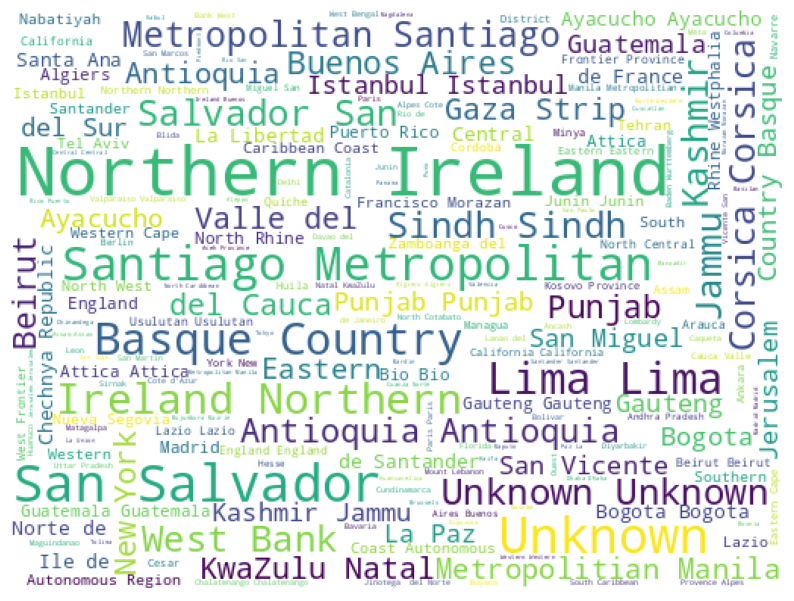

In [18]:
from wordcloud import WordCloud
from scipy import signal
cities = terror.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [19]:
terror['Year'].value_counts(dropna = False).sort_index()

1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979    2662
1980    2662
1981    2586
1982    2544
1983    2870
1984    3495
1985    2915
1986    2860
1987    3183
1988    3721
1989    4324
1990    3887
1991    4683
1992    5071
1994    3456
1995    3081
1996    3058
1997    3197
1998     934
1999    1395
2000    1814
2001    1906
2002    1333
2003     738
Name: Year, dtype: int64

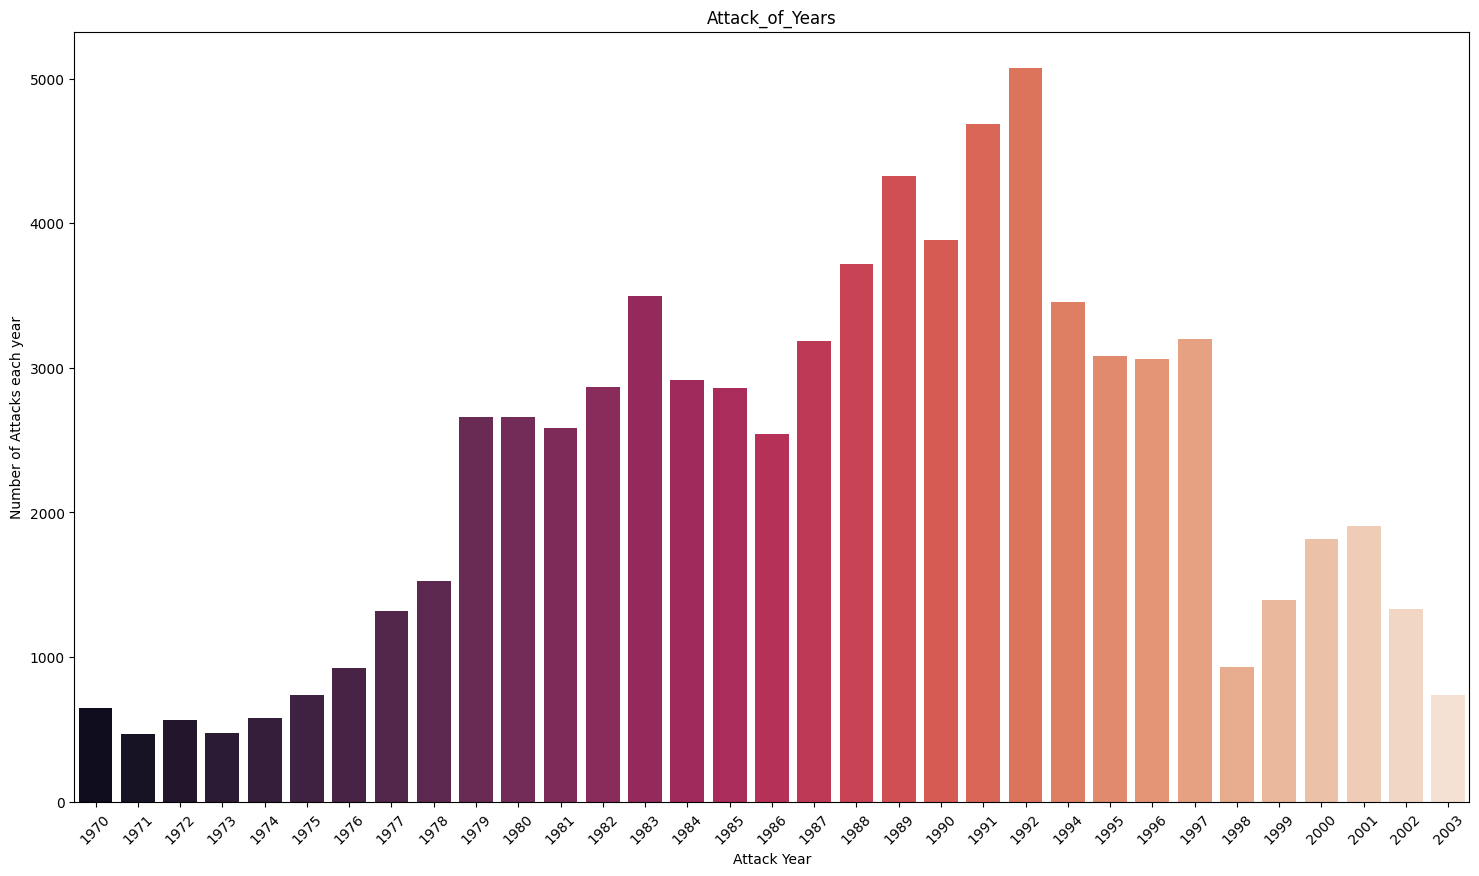

In [20]:
x_year = terror['Year'].unique()
y_count_years = terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

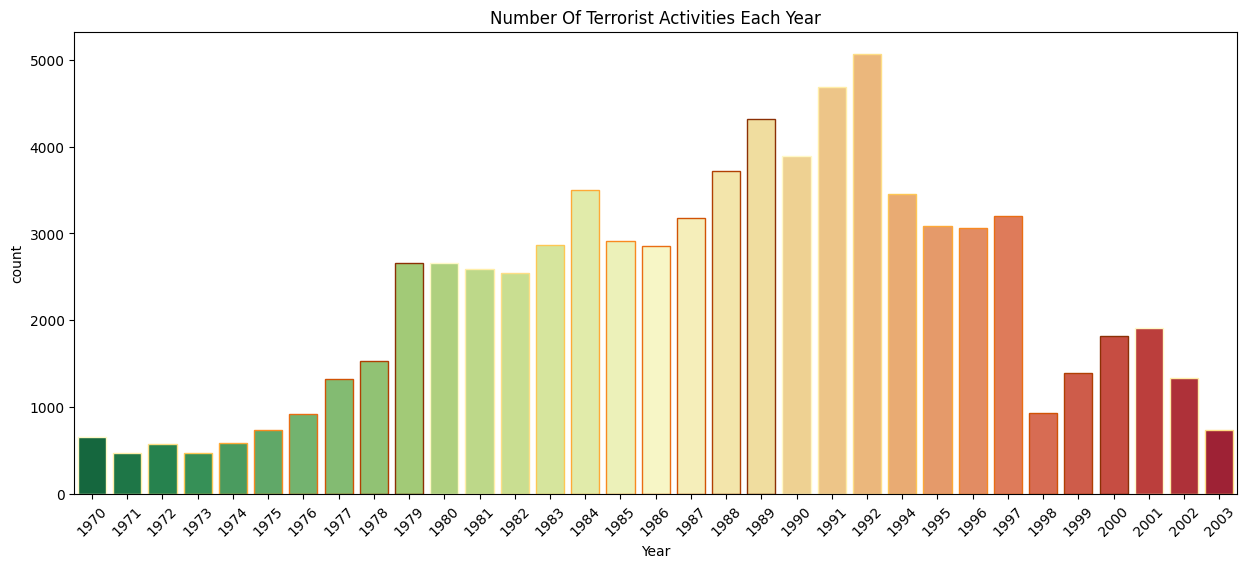

In [22]:
plt.subplots(figsize=(15, 6))
sns.countplot(x='Year', data=terror, palette='RdYlGn_r', edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()


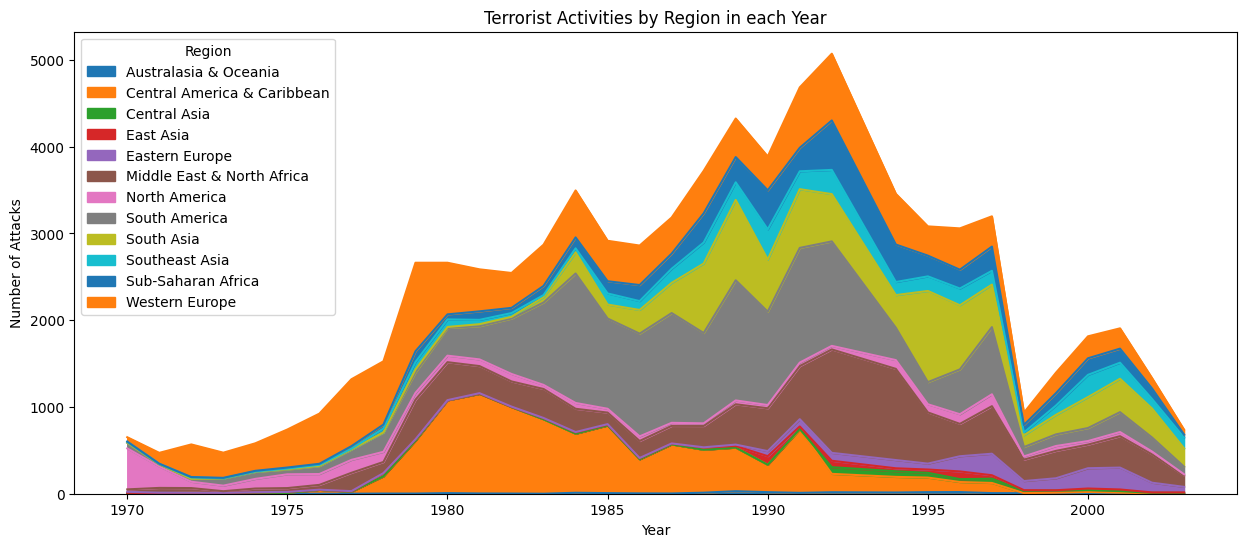

In [23]:
pd.crosstab(terror.Year, terror.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [27]:
terror['Wounded'] = terror['Wounded'].fillna(0).astype(int)
terror['Killed'] = terror['Killed'].fillna(0).astype(int)
terror['casualities'] = terror['Killed'] + terror['Wounded']

In [28]:
terror1 = terror.sort_values(by='casualities',ascending=False)[:40]

In [29]:
heat=terror1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)
heat.head()

Year,1978,1980,1981,1982,1983,1984,1985,1987,1992,1994,1995,1996,1997,1998,1999,2001,2002
Country,,,,,,,,,,,,,,,,,
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,329.0,0.0,450.0,0.0,0.0,0.0,0.0
Angola,0.0,0.0,0.0,0.0,396.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419.0,0.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,321.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bangladesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317.0
Burundi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,389.5,0.0,0.0,0.0,0.0,0.0


In [64]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Ensure that your heat DataFrame contains valid data
# You can check data in the following format:
# heat = pd.DataFrame(...)  # Ensure the data is structured correctly

colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'], [.6, '#8856a7'], [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)

data = [heatmap]

layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis=dict(ticks='', nticks=20),
    yaxis=dict(ticks='')
)

fig = go.Figure(data=data, layout=layout)

# Display the plot
fig.show()


In [36]:
terror.Country.value_counts()[:15]

Colombia          6768
Peru              6031
El Salvador       5320
United Kingdom    4366
India             3766
Spain             3068
Turkey            2556
United States     2483
France            2347
Philippines       2316
Chile             2278
Sri Lanka         2277
Guatemala         2037
Pakistan          1981
Nicaragua         1968
Name: Country, dtype: int64

Text(0, 0.5, 'Count')

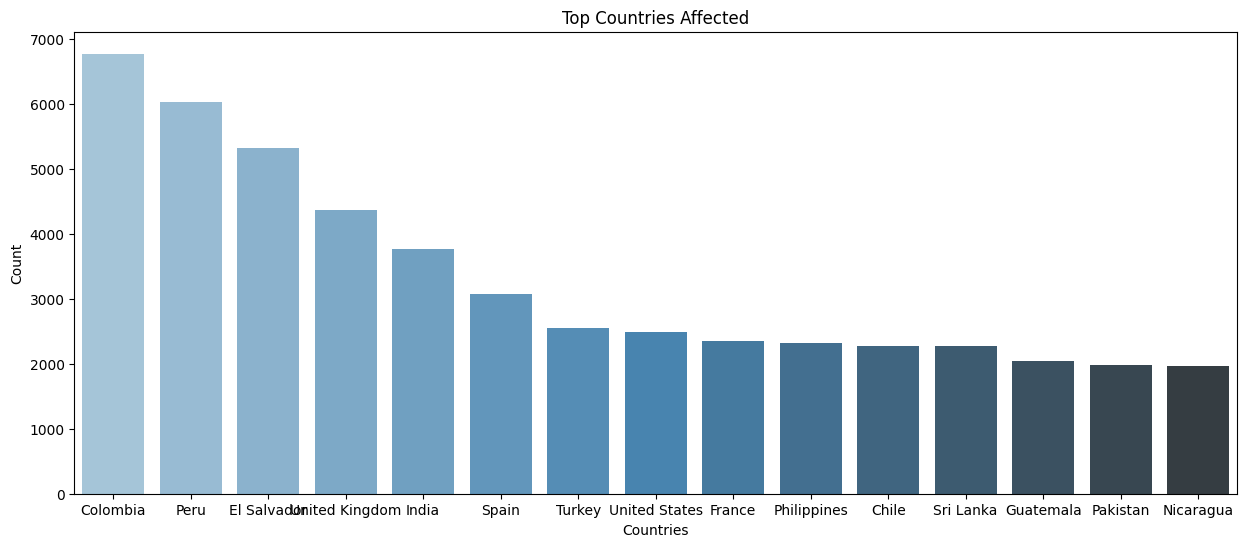

In [38]:

plt.subplots(figsize=(15, 6))
sns.barplot(x=terror['Country'].value_counts()[:15].index, y=terror['Country'].value_counts()[:15].values, palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')


In [39]:
import folium
from folium.plugins import MarkerCluster
filterYear = terror['Year'] == 1970

In [40]:
filterData = terror[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()

In [ ]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

In [44]:
terror.Group.value_counts()[1:15]

Shining Path (SL)                                   4507
Farabundo Marti National Liberation Front (FMLN)    3351
Irish Republican Army (IRA)                         2664
Basque Fatherland and Freedom (ETA)                 1901
Revolutionary Armed Forces of Colombia (FARC)       1517
National Liberation Army of Colombia (ELN)          1254
Palestinians                                        1125
Liberation Tigers of Tamil Eelam (LTTE)             1113
Kurdistan Workers' Party (PKK)                      1077
New People's Army (NPA)                             1030
Nicaraguan Democratic Force (FDN)                    895
Manuel Rodriguez Patriotic Front (FPMR)              830
Sikh Extremists                                      715
African National Congress (South Africa)             607
Name: Group, dtype: int64

In [45]:
test = terror[terror.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [46]:
test.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan'], dtype=object)

In [43]:
terror_df_group = terror.dropna(subset=['latitude','longitude'])
terror_df_group = terror_df_group.drop_duplicates(subset=['Country','Group'])
terrorist_groups = terror.Group.value_counts()[1:8].index.tolist()
terror_df_group = terror_df_group.loc[terror_df_group.Group.isin(terrorist_groups)]
print(terror_df_group.Group.unique())

['Palestinians' 'Irish Republican Army (IRA)'
 'Basque Fatherland and Freedom (ETA)'
 'National Liberation Army of Colombia (ELN)'
 'Revolutionary Armed Forces of Colombia (FARC)' 'Shining Path (SL)'
 'Farabundo Marti National Liberation Front (FMLN)']


In [ ]:
map = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(terror_df_group)):
    folium.Marker([terror_df_group.iloc[i]['latitude'],terror_df_group.iloc[i]['longitude']],
                  popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['Group'],
                  terror_df_group.iloc[i]['Country'])).add_to(map)
map

In [53]:
terror.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0


In [54]:

killData = terror.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 158944


In [55]:
# Let's look at what types of attacks these deaths were made of.
attackData = terror.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [56]:
typeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [57]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,85441,16791,34353,1797,3483,1160,2901,634,12384


In [58]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int64
 1   Assassination                        1 non-null      int64
 2   Bombing/Explosion                    1 non-null      int64
 3   Facility/Infrastructure Attack       1 non-null      int64
 4   Hijacking                            1 non-null      int64
 5   Hostage Taking (Barricade Incident)  1 non-null      int64
 6   Hostage Taking (Kidnapping)          1 non-null      int64
 7   Unarmed Assault                      1 non-null      int64
 8   Unknown                              1 non-null      int64
dtypes: int64(9)
memory usage: 188.0+ bytes


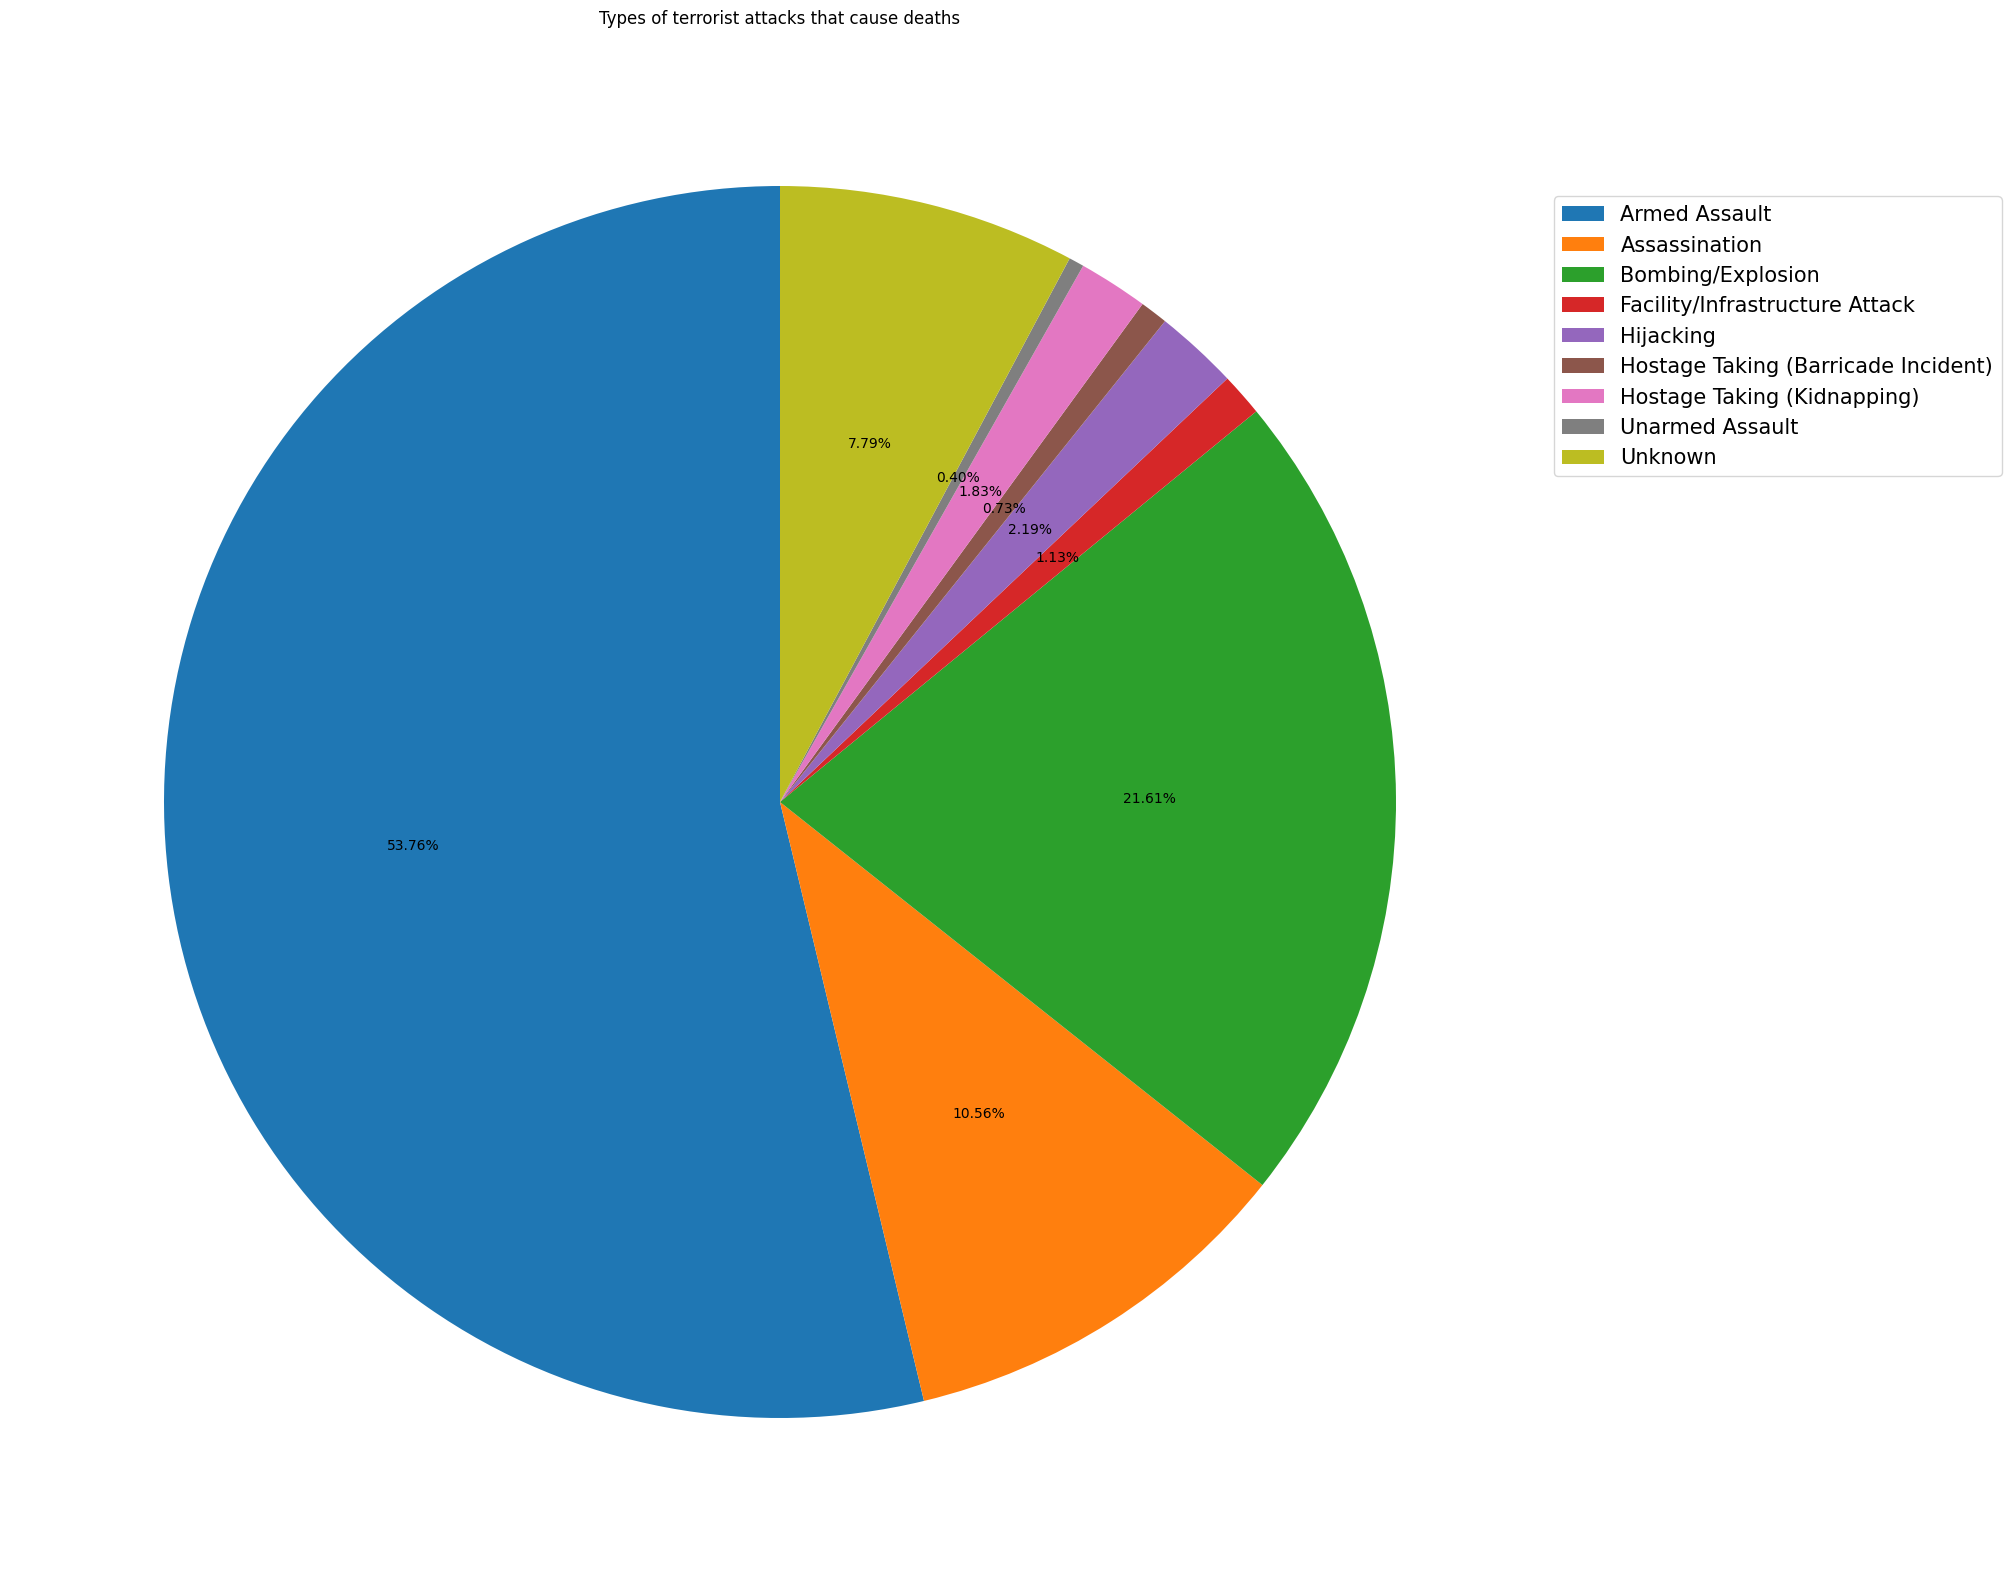

In [60]:
import numpy as np  # Import numpy for flattening the list

# Flatten the 2D list to 1D
flat_values = np.array(values).flatten()

# Create the pie chart
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(flat_values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')

# Provide labels for each segment
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 0.9), fontsize=15)

# Display the pie chart
plt.show()
